# **Fashion MNIST Classification - Improving CNN performance** 

The previous model gave us a test accuracy of 0.88. Let us try to implement few methods to see if this accuracy can be increased.

In [1]:
import warnings
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist

sns.set()
warnings.filterwarnings('ignore')

In [2]:
#Load the data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Shuffle the indices
indices = np.arange(len(X_train))
np.random.shuffle(indices)  

# Apply the shuffle to the data
X_train = X_train[indices]
y_train = y_train[indices]

X_train = X_train / 255.0  
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 28 * 28)  
X_test = X_test.reshape(-1, 28 * 28)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [3]:
def create_model():
    model = keras.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),  # First convolutional layer
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),  # First max-pooling layer
        layers.Dropout(0.3),
        
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),  # Second convolutional layer
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),  # Second max-pooling layer
        layers.Dropout(0.3),
        
        layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),  # Third convolutional layer
        layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),  # Fourth convolutional layer
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),  # Third max-pooling layer
        layers.Dropout(0.3),
        
        layers.Flatten(),  # Flatten the 3D output to 1D
        layers.Dense(64, activation='relu'),  # Dense layer for further processing
        layers.Dropout(0.3),
        
        layers.Dense(10, activation='softmax')  # Output layer for 10 classes (softmax activation)
    ])
    return model

**Changes made to the previous model**:
1. Two more Convolution layers are added.

2. **Batch Normalization**: This method normalizes the input of each layer by subtracting the batch mean and dividing by the batch standard deviation. It helps in mitigating problem of vanishing and exploding gradients, and acts as a regularizer, allowing for higher learning rates and deeper networks.

3. **Dropout**: In this method, neurons are randomly selected and removed or "dropped out" from the network with a certain probability (0.3 in this case). This causes the network to re-train on a thinned network with few neurons missing. If any neurons are not learning anything during training in the normal case, dropout forces these neurons to extract new complex features, thus making the network more robust and generalized. .

In [4]:
model1 = create_model()
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,594 (1.20 MB)

 Trainable params: 315,146 (1.20 MB)

 Non-trainable params: 448 (1.75 KB)

In [5]:
model1.compile(optimizer=keras.optimizers.Adam(), 
               loss='sparse_categorical_crossentropy', 
               metrics=['accuracy'])

One more callback is added this time, in addition to Early Stopping, called **ModelCheckpoint**. In early stopping, we monitor the Validation Loss and try to stop at a model configuration giving best (i.e. least) Validation Loss. Model Checkpoint, on the other hand, monitors Validation Accuracy, and saves the model with best Validation Accuracy. Thus, we get two separate models, which allows us for better evaluation and model selection.

In [6]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                                               min_delta=1e-3, 
                                               patience=5, 
                                               restore_best_weights=True)

model_checkpoint = keras.callbacks.ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

In [7]:
start_time = time.time()
history1 = model1.fit(X_train,
                      y_train,
                      epochs=100,
                      batch_size=1024,
                      callbacks=[early_stopping, model_checkpoint],
                      validation_split=0.2,
                      validation_batch_size=1024,
                      verbose=1)
fit_time = time.time() - start_time

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 35s 645ms/step - accuracy: 0.5187 - loss: 1.5523 - val_accuracy: 0.2092 - val_loss: 2.5630
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 29s 621ms/step - accuracy: 0.7685 - loss: 0.6360 - val_accuracy: 0.1998 - val_loss: 3.2335
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 31s 666ms/step - accuracy: 0.8085 - loss: 0.5213 - val_accuracy: 0.1661 - val_loss: 3.4852
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 31s 668ms/step - accuracy: 0.8410 - loss: 0.4433 - val_accuracy: 0.2138 - val_loss: 2.9206
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 31s 667ms/step - accuracy: 0.8485 - loss: 0.4145 - val_accuracy: 0.3458 - val_loss: 2.2989
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 31s 671ms/step - accuracy: 0.8651 - loss: 0.3749 - val_accuracy: 0.4800 - val_loss: 1.7986
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 680ms/step - accuracy: 0.8675 - loss: 0.3592 - val_accuracy: 0.5735 - val_loss: 1.4978
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 679ms/step - accuracy: 0.8768 - loss: 0.3459 - 

In [8]:
print(f"Total time required = {fit_time/60:.1f} minutes")

Total time required = 14.3 minutes


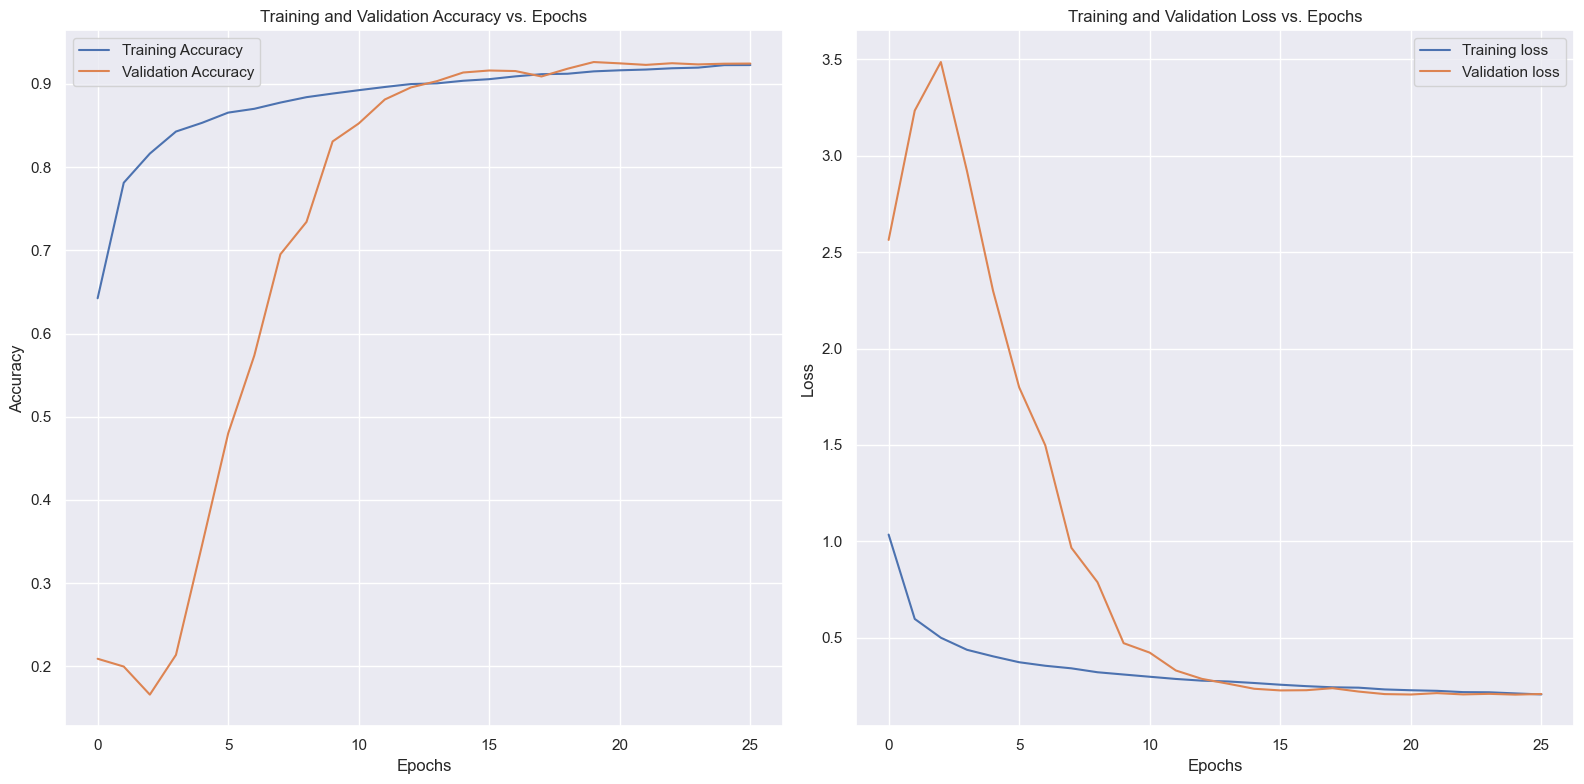

In [9]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history1.history['loss'], label='Training loss')
plt.plot(history1.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
train_loss1, train_accuracy1 = model1.evaluate(X_train, y_train, verbose=0)
test_loss1, test_accuracy1 = model1.evaluate(X_test, y_test, verbose=0)

In [20]:
print("BEST MODEL WITH RESPECT TO VALIDATION LOSS:")
print(f"Training Loss: {train_loss1:.3f}, Training Accuracy: {train_accuracy1:.3f}")
print(f"Test Loss: {test_loss1:.3f}, Test Accuracy: {test_accuracy1:.3f}")

BEST MODEL WITH RESPECT TO VALIDATION LOSS:
Training Loss: 0.167, Training Accuracy: 0.937
Test Loss: 0.232, Test Accuracy: 0.916


Thus, test accuracy has now increased from 0.88 to 0.91.

In [14]:
model_best_accuracy = keras.models.load_model('best_model.keras')

In [16]:
train_loss2, train_accuracy2 = model_best_accuracy.evaluate(X_train, y_train, verbose=0)
test_loss2, test_accuracy2 = model_best_accuracy.evaluate(X_test, y_test, verbose=0)

In [21]:
print("BEST MODEL WITH RESPECT TO ACCURACY:")
print(f"Training Loss: {train_loss2:.3f}, Training Accuracy: {train_accuracy2:.3f}")
print(f"Test Loss: {test_loss2:.3f}, Test Accuracy: {test_accuracy2:.3f}")

BEST MODEL WITH RESPECT TO ACCURACY:
Training Loss: 0.170, Training Accuracy: 0.936
Test Loss: 0.229, Test Accuracy: 0.917


Both the models are giving approximately same accuracy and loss value, indicating that model1 has both best accuuracy and least validation loss, for given early stopping criteria.

In [28]:
y_test_pred_prob = model1.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [29]:
y_test_pred

array([[7.1801426e-11, 9.6227881e-10, 2.8004240e-13, ..., 2.6507312e-05,
        1.9716699e-11, 9.9997318e-01],
       [4.5638987e-07, 4.8533927e-14, 9.9995029e-01, ..., 1.6235440e-15,
        2.0825737e-11, 2.1465868e-20],
       [8.5610967e-15, 1.0000000e+00, 9.4956337e-14, ..., 9.8902048e-17,
        2.8850090e-16, 5.1480926e-15],
       ...,
       [2.5795804e-10, 9.5573619e-17, 4.6479181e-14, ..., 2.5189462e-13,
        1.0000000e+00, 3.6057057e-13],
       [1.0789759e-14, 1.0000000e+00, 1.2825875e-13, ..., 6.8613870e-14,
        6.4327825e-17, 4.8053656e-14],
       [4.6969457e-05, 1.1336935e-05, 1.4171627e-05, ..., 8.0706370e-01,
        1.2900056e-03, 3.3220791e-04]], dtype=float32)

In [31]:
y_test_pred_prob[0]

array([7.1801426e-11, 9.6227881e-10, 2.8004240e-13, 5.3214575e-11,
       4.9097020e-15, 3.4029864e-07, 2.8535587e-11, 2.6507312e-05,
       1.9716699e-11, 9.9997318e-01], dtype=float32)

For each datapoint, y_test_pred gives us predicted probability distribution across all classes. Let us convert this to predicted class label, by selecting class with maximum probability.

In [35]:
y_test_pred = y_test_pred_prob.argmax(axis=1) # Across rows

In [37]:
y_test_pred

array([9, 2, 1, ..., 8, 1, 7], dtype=int64)

In [38]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [40]:
y_labels = {0:"T-shirt/top",
            1:"Trouser",
            2:"Pullover",
            3:"Dress",
            4:"Coat",
            5:"Sandal",
            6:"Shirt",
            7:"Sneaker",
            8:"Bag",
            9:"Ankle boot"}

y_labels_list = [y_labels[i] for i in y_labels]

In [44]:
y_labels_list

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [41]:
from sklearn import metrics

In [54]:
print(metrics.classification_report(y_test, y_test_pred, target_names=y_labels_list, digits=3))

              precision    recall  f1-score   support

 T-shirt/top      0.874     0.880     0.877      1000
     Trouser      0.995     0.979     0.987      1000
    Pullover      0.838     0.913     0.874      1000
       Dress      0.920     0.924     0.922      1000
        Coat      0.873     0.839     0.856      1000
      Sandal      0.988     0.972     0.980      1000
       Shirt      0.781     0.739     0.760      1000
     Sneaker      0.929     0.990     0.958      1000
         Bag      0.983     0.985     0.984      1000
  Ankle boot      0.987     0.944     0.965      1000

    accuracy                          0.916     10000
   macro avg      0.917     0.916     0.916     10000
weighted avg      0.917     0.916     0.916     10000



In [67]:
cf = metrics.confusion_matrix(y_test, y_test_pred)

<Figure size 1600x1600 with 0 Axes>

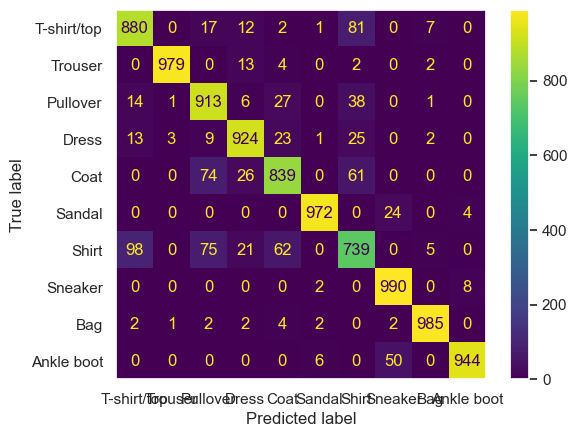

In [75]:
plt.figure(figsize=(16,16))
disp = metrics.ConfusionMatrixDisplay(cf,display_labels=y_labels_list)
disp.plot()
plt.grid(False)